# 3 - Main

## 3.1

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



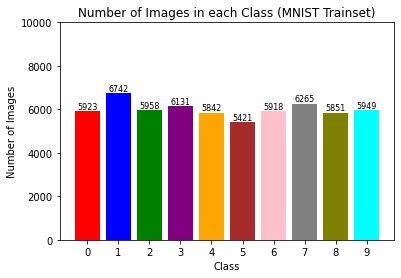

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Load MNIST training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)

# Get labels for each image in the dataset
labels = [trainset[i][1] for i in range(len(trainset))]

# Count the number of images in each class
counts = [labels.count(i) for i in range(10)]

# Define color map for different classes
colors = ['red', 'blue', 'green', 'purple', 'orange',
          'brown', 'pink', 'gray', 'olive', 'cyan']

# Plot the number-class graph
plt.bar(range(10), counts, color=colors)

# Add text labels for each class
for i in range(10):
    plt.text(i, counts[i] + 100, str(counts[i]), ha='center', fontsize=8)
#     plt.text(i, 4000, str(i), ha='center', fontsize=12)

# Set plot title, axis labels, and limits
plt.title('Number of Images in each Class (MNIST Trainset)')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.ylim(0, 10000)

# Set x-axis ticks and labels
plt.xticks(range(10), [str(i) for i in range(10)])

# Save and show plot
plt.savefig('numberclassgraph.pdf')
plt.show()

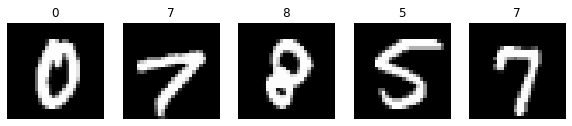

In [ ]:
import torch
import torchvision
import random
import matplotlib.pyplot as plt

# Load MNIST training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)

# Get 5 random images and their labels
indices = random.sample(range(len(trainset)), 5)
images = [trainset[i][0] for i in indices]
labels = [trainset[i][1] for i in indices]

# Plot the images
fig, axs = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    img = images[i]
    if hasattr(img, 'shape'):
        if len(img.shape) == 3 and img.shape[0] == 1:
            img = img.squeeze(0)
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(str(labels[i]))

# Save and show plot
plt.savefig('fiverand.pdf')
plt.show()

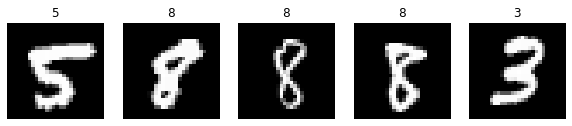

In [ ]:
import torch
import torchvision
import random
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Load MNIST training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)

# Calculate mean and standard deviation of the training set
train_data = trainset.data.numpy()
mean = train_data.mean() / 255.0
std = train_data.std() / 255.0

# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Get 5 random images and their labels
indices = random.sample(range(len(trainset)), 5)
images = [trainset[i][0] for i in indices]
labels = [trainset[i][1] for i in indices]

# Apply the data transformation to the images
images_normalized = [transform(img) for img in images]

# Plot the images
fig, axs = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    img = images_normalized[i].numpy().squeeze()
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(str(labels[i]))

# Save and show plot
plt.savefig('fiverandnormal.pdf')
plt.show()

In [ ]:
import torchvision.datasets as datasets

# Load MNIST training dataset
trainset = datasets.MNIST(root='./data', train=True, download=True)

# Get the first image in the dataset
image, label = trainset[0]

# Calculate the height and width of the image
height, width = image.size

# Print the result
print("Each data of MNIST has {} x {} = {} features.".format(height, width, height*width))

Each data of MNIST has 28 x 28 = 784 features.


## 3.2

Epoch [1/20], Train Loss: 0.0691, Valid Loss: 0.0520
Epoch [2/20], Train Loss: 0.0432, Valid Loss: 0.0343
Epoch [3/20], Train Loss: 0.0315, Valid Loss: 0.0286
Epoch [4/20], Train Loss: 0.0271, Valid Loss: 0.0251
Epoch [5/20], Train Loss: 0.0245, Valid Loss: 0.0230
Epoch [6/20], Train Loss: 0.0224, Valid Loss: 0.0210
Epoch [7/20], Train Loss: 0.0204, Valid Loss: 0.0193
Epoch [8/20], Train Loss: 0.0191, Valid Loss: 0.0181
Epoch [9/20], Train Loss: 0.0180, Valid Loss: 0.0172
Epoch [10/20], Train Loss: 0.0169, Valid Loss: 0.0161
Epoch [11/20], Train Loss: 0.0161, Valid Loss: 0.0157
Epoch [12/20], Train Loss: 0.0155, Valid Loss: 0.0151
Epoch [13/20], Train Loss: 0.0150, Valid Loss: 0.0147
Epoch [14/20], Train Loss: 0.0146, Valid Loss: 0.0143
Epoch [15/20], Train Loss: 0.0142, Valid Loss: 0.0140
Epoch [16/20], Train Loss: 0.0139, Valid Loss: 0.0137
Epoch [17/20], Train Loss: 0.0135, Valid Loss: 0.0133
Epoch [18/20], Train Loss: 0.0132, Valid Loss: 0.0131
Epoch [19/20], Train Loss: 0.0129, Va

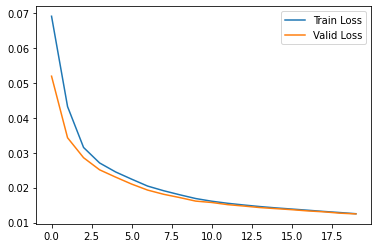

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

# Hyperparameters
num_epochs = 20
batch_size = 128
learning_rate = 0.0003

# MNIST dataset
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 500),
            nn.ReLU(True),
            nn.Linear(500, 300),
            nn.ReLU(True),
            nn.Linear(300, 100),
            nn.ReLU(True),
            nn.Linear(100, 30),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(30, 100),
            nn.ReLU(True),
            nn.Linear(100, 300),
            nn.ReLU(True),
            nn.Linear(300, 500),
            nn.ReLU(True),
            nn.Linear(500, 784),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Create autoencoder object
autoencoder = Autoencoder()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Train the model
train_loss = []
valid_loss = []

for epoch in range(num_epochs):
    # Train
    total_loss = 0
    for i, (images, _) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        optimizer.zero_grad()
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_loss.append(total_loss/len(train_loader))

    # Validation
    total_loss = 0
    for i, (images, _) in enumerate(test_loader):
        images = Variable(images.view(-1, 28*28))
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        total_loss += loss.item()

    valid_loss.append(total_loss/len(test_loader))

    print('Epoch [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
          .format(epoch+1, num_epochs, train_loss[-1], valid_loss[-1]))

# Save the trained model weights
torch.save(autoencoder.state_dict(), 'autoencoder.pth')


# Plot loss
import matplotlib.pyplot as plt
plt.plot(train_loss, label='Train Loss')
plt.plot(valid_loss, label='Valid Loss')
plt.legend()
plt.savefig('Loss.pdf')
plt.show()

## 3.3

Epoch [1/20], Train Loss: 0.5192, Valid Loss: 0.2528, Train Acc: 0.8578, Valid Acc: 0.9220
Epoch [2/20], Train Loss: 0.2342, Valid Loss: 0.1974, Train Acc: 0.9282, Valid Acc: 0.9392
Epoch [3/20], Train Loss: 0.1941, Valid Loss: 0.1733, Train Acc: 0.9408, Valid Acc: 0.9472
Epoch [4/20], Train Loss: 0.1704, Valid Loss: 0.1598, Train Acc: 0.9482, Valid Acc: 0.9507
Epoch [5/20], Train Loss: 0.1571, Valid Loss: 0.1454, Train Acc: 0.9509, Valid Acc: 0.9547
Epoch [6/20], Train Loss: 0.1447, Valid Loss: 0.1384, Train Acc: 0.9548, Valid Acc: 0.9564
Epoch [7/20], Train Loss: 0.1378, Valid Loss: 0.1295, Train Acc: 0.9574, Valid Acc: 0.9591
Epoch [8/20], Train Loss: 0.1295, Valid Loss: 0.1292, Train Acc: 0.9594, Valid Acc: 0.9590
Epoch [9/20], Train Loss: 0.1247, Valid Loss: 0.1256, Train Acc: 0.9610, Valid Acc: 0.9600
Epoch [10/20], Train Loss: 0.1189, Valid Loss: 0.1200, Train Acc: 0.9625, Valid Acc: 0.9607
Epoch [11/20], Train Loss: 0.1152, Valid Loss: 0.1140, Train Acc: 0.9634, Valid Acc: 0.96

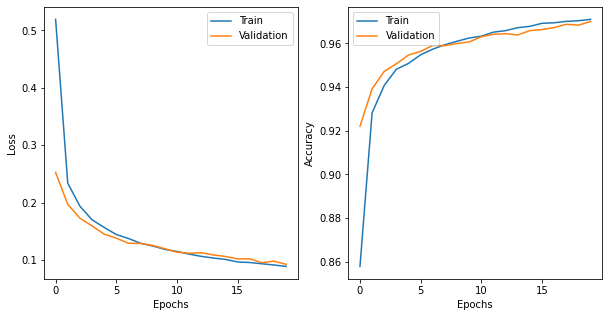

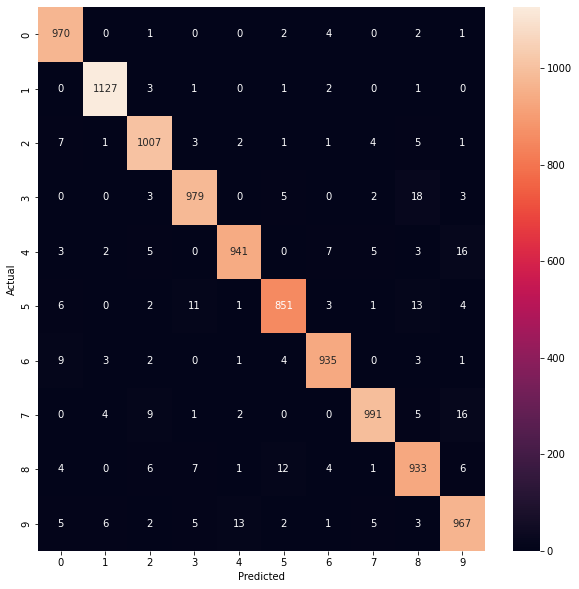

F1 Score: 0.9700930692196958
Precision: 0.9701794432716815
Recall: 0.9701


In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Hyperparameters
num_epochs = 20
batch_size = 128
learning_rate = 0.0003

# MNIST dataset
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 500),
            nn.ReLU(True),
            nn.Linear(500, 300),
            nn.ReLU(True),
            nn.Linear(300, 100),
            nn.ReLU(True),
            nn.Linear(100, 30),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(30, 100),
            nn.ReLU(True),
            nn.Linear(100, 300),
            nn.ReLU(True),
            nn.Linear(300, 500),
            nn.ReLU(True),
            nn.Linear(500, 784),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Create autoencoder object and load trained parameters
autoencoder = Autoencoder()
autoencoder.load_state_dict(torch.load('autoencoder.pth'))
encoder = autoencoder.encoder

# Classifier model
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.layer1 = nn.Linear(30, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.functional.relu(x)
        x = self.layer2(x)
        x = nn.functional.relu(x)
        x = self.layer3(x)
        return x

# Create classifier object
classifier = Classifier()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

# Train the model
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

for epoch in range(num_epochs):
    # Train
    total_loss = 0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        features = encoder(images)
        outputs = classifier(features)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss.append(total_loss/len(train_loader))
    train_acc.append(correct/total)

    # Validation
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
            features = encoder(images)
            outputs = classifier(features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    valid_loss.append(total_loss/len(test_loader))
    valid_acc.append(correct/total)

    # Print statistics
    print ('Epoch [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}, Train Acc: {:.4f}, Valid Acc: {:.4f}'
           .format(epoch+1, num_epochs, train_loss[-1], valid_loss[-1], train_acc[-1], valid_acc[-1]))

# Save the trained model weights
torch.save(classifier.state_dict(), 'classifier.pth')

# Plot loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train')
plt.plot(valid_loss, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train')
plt.plot(valid_acc, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('LossAccur2.pdf')
plt.show()

# Evaluate the model
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        labels = labels.numpy().tolist()
        features = encoder(images)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
        predicted = predicted.numpy().tolist()
        y_true.extend(labels)
        y_pred.extend(predicted)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('conf.pdf')
plt.show()

# Report metrics
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)

   


Saving test_image.jpg to test_image (37).jpg
Predicted class: 0


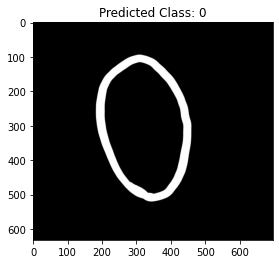

In [ ]:
import io
import requests
from PIL import Image
import numpy as np

# Define a function to predict the class of an input image
def predict_image(image_path, encoder, classifier):
    # Open and preprocess the image
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_tensor = transforms.ToTensor()(img)
    img_tensor = img_tensor.view(-1, 28*28)
    # Pass the image through the encoder and classifier
    with torch.no_grad():
        features = encoder(img_tensor)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
    # Return the predicted class
    return predicted.item()

# Upload an image and predict its class
from google.colab import files

# Upload the image
uploaded = files.upload()

# Predict the class
image_path = next(iter(uploaded))
predicted_class = predict_image(io.BytesIO(uploaded[image_path]), encoder, classifier)

# Print the predicted class
print('Predicted class:', predicted_class)

# Open the uploaded image
img = Image.open(io.BytesIO(uploaded[image_path]))

# Create a figure with the image and the predicted class as the title
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Predicted Class: {}'.format(predicted_class))

# Save the plot as a pdf
plt.savefig('prediction0.pdf')
plt.show()

Saving test_image.jpg to test_image (6).jpg
Predicted class: 1


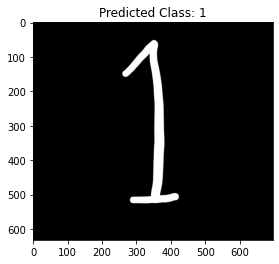

In [ ]:
import io
import requests
from PIL import Image
import numpy as np

# Define a function to predict the class of an input image
def predict_image(image_path, encoder, classifier):
    # Open and preprocess the image
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_tensor = transforms.ToTensor()(img)
    img_tensor = img_tensor.view(-1, 28*28)
    # Pass the image through the encoder and classifier
    with torch.no_grad():
        features = encoder(img_tensor)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
    # Return the predicted class
    return predicted.item()

# Upload an image and predict its class
from google.colab import files

# Upload the image
uploaded = files.upload()

# Predict the class
image_path = next(iter(uploaded))
predicted_class = predict_image(io.BytesIO(uploaded[image_path]), encoder, classifier)

# Print the predicted class
print('Predicted class:', predicted_class)

# Open the uploaded image
img = Image.open(io.BytesIO(uploaded[image_path]))

# Create a figure with the image and the predicted class as the title
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Predicted Class: {}'.format(predicted_class))

# Save the plot as a pdf
plt.savefig('prediction1.pdf')
plt.show()

Saving test_image.jpg to test_image (7).jpg
Predicted class: 2


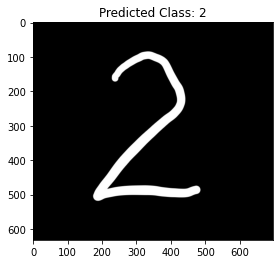

In [ ]:
import io
import requests
from PIL import Image
import numpy as np

# Define a function to predict the class of an input image
def predict_image(image_path, encoder, classifier):
    # Open and preprocess the image
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_tensor = transforms.ToTensor()(img)
    img_tensor = img_tensor.view(-1, 28*28)
    # Pass the image through the encoder and classifier
    with torch.no_grad():
        features = encoder(img_tensor)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
    # Return the predicted class
    return predicted.item()

# Upload an image and predict its class
from google.colab import files

# Upload the image
uploaded = files.upload()

# Predict the class
image_path = next(iter(uploaded))
predicted_class = predict_image(io.BytesIO(uploaded[image_path]), encoder, classifier)

# Print the predicted class
print('Predicted class:', predicted_class)

# Open the uploaded image
img = Image.open(io.BytesIO(uploaded[image_path]))

# Create a figure with the image and the predicted class as the title
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Predicted Class: {}'.format(predicted_class))

# Save the plot as a pdf
plt.savefig('prediction2.pdf')
plt.show()

Saving test_image.jpg to test_image (14).jpg
Predicted class: 3


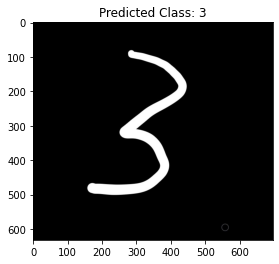

In [ ]:
import io
import requests
from PIL import Image
import numpy as np

# Define a function to predict the class of an input image
def predict_image(image_path, encoder, classifier):
    # Open and preprocess the image
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_tensor = transforms.ToTensor()(img)
    img_tensor = img_tensor.view(-1, 28*28)
    # Pass the image through the encoder and classifier
    with torch.no_grad():
        features = encoder(img_tensor)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
    # Return the predicted class
    return predicted.item()

# Upload an image and predict its class
from google.colab import files

# Upload the image
uploaded = files.upload()

# Predict the class
image_path = next(iter(uploaded))
predicted_class = predict_image(io.BytesIO(uploaded[image_path]), encoder, classifier)

# Print the predicted class
print('Predicted class:', predicted_class)

# Open the uploaded image
img = Image.open(io.BytesIO(uploaded[image_path]))

# Create a figure with the image and the predicted class as the title
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Predicted Class: {}'.format(predicted_class))

# Save the plot as a pdf
plt.savefig('prediction3.pdf')
plt.show()

Saving test_image.jpg to test_image (17).jpg
Predicted class: 4


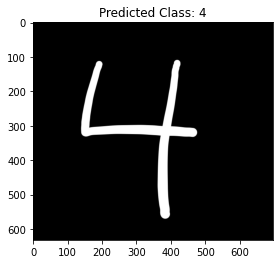

In [ ]:
import io
import requests
from PIL import Image
import numpy as np

# Define a function to predict the class of an input image
def predict_image(image_path, encoder, classifier):
    # Open and preprocess the image
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_tensor = transforms.ToTensor()(img)
    img_tensor = img_tensor.view(-1, 28*28)
    # Pass the image through the encoder and classifier
    with torch.no_grad():
        features = encoder(img_tensor)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
    # Return the predicted class
    return predicted.item()

# Upload an image and predict its class
from google.colab import files

# Upload the image
uploaded = files.upload()

# Predict the class
image_path = next(iter(uploaded))
predicted_class = predict_image(io.BytesIO(uploaded[image_path]), encoder, classifier)

# Print the predicted class
print('Predicted class:', predicted_class)

# Open the uploaded image
img = Image.open(io.BytesIO(uploaded[image_path]))

# Create a figure with the image and the predicted class as the title
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Predicted Class: {}'.format(predicted_class))

# Save the plot as a pdf
plt.savefig('prediction4.pdf')
plt.show()

Saving test_image.jpg to test_image (22).jpg
Predicted class: 5


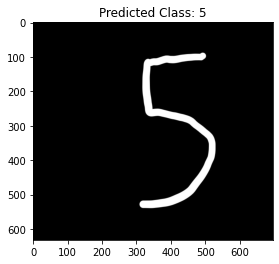

In [ ]:
import io
import requests
from PIL import Image
import numpy as np

# Define a function to predict the class of an input image
def predict_image(image_path, encoder, classifier):
    # Open and preprocess the image
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_tensor = transforms.ToTensor()(img)
    img_tensor = img_tensor.view(-1, 28*28)
    # Pass the image through the encoder and classifier
    with torch.no_grad():
        features = encoder(img_tensor)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
    # Return the predicted class
    return predicted.item()

# Upload an image and predict its class
from google.colab import files

# Upload the image
uploaded = files.upload()

# Predict the class
image_path = next(iter(uploaded))
predicted_class = predict_image(io.BytesIO(uploaded[image_path]), encoder, classifier)

# Print the predicted class
print('Predicted class:', predicted_class)

# Open the uploaded image
img = Image.open(io.BytesIO(uploaded[image_path]))

# Create a figure with the image and the predicted class as the title
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Predicted Class: {}'.format(predicted_class))

# Save the plot as a pdf
plt.savefig('prediction5.pdf')
plt.show()

Saving test_image.jpg to test_image (23).jpg
Predicted class: 6


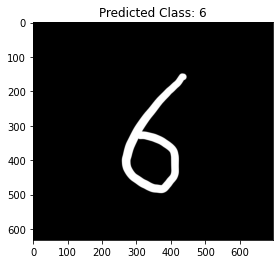

In [ ]:
import io
import requests
from PIL import Image
import numpy as np

# Define a function to predict the class of an input image
def predict_image(image_path, encoder, classifier):
    # Open and preprocess the image
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_tensor = transforms.ToTensor()(img)
    img_tensor = img_tensor.view(-1, 28*28)
    # Pass the image through the encoder and classifier
    with torch.no_grad():
        features = encoder(img_tensor)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
    # Return the predicted class
    return predicted.item()

# Upload an image and predict its class
from google.colab import files

# Upload the image
uploaded = files.upload()

# Predict the class
image_path = next(iter(uploaded))
predicted_class = predict_image(io.BytesIO(uploaded[image_path]), encoder, classifier)

# Print the predicted class
print('Predicted class:', predicted_class)

# Open the uploaded image
img = Image.open(io.BytesIO(uploaded[image_path]))

# Create a figure with the image and the predicted class as the title
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Predicted Class: {}'.format(predicted_class))

# Save the plot as a pdf
plt.savefig('prediction6.pdf')
plt.show()

Saving test_image.jpg to test_image (29).jpg
Predicted class: 7


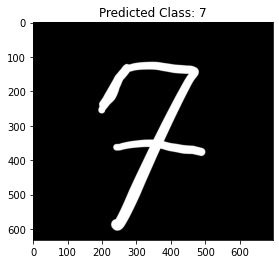

In [ ]:
import io
import requests
from PIL import Image
import numpy as np

# Define a function to predict the class of an input image
def predict_image(image_path, encoder, classifier):
    # Open and preprocess the image
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_tensor = transforms.ToTensor()(img)
    img_tensor = img_tensor.view(-1, 28*28)
    # Pass the image through the encoder and classifier
    with torch.no_grad():
        features = encoder(img_tensor)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
    # Return the predicted class
    return predicted.item()

# Upload an image and predict its class
from google.colab import files

# Upload the image
uploaded = files.upload()

# Predict the class
image_path = next(iter(uploaded))
predicted_class = predict_image(io.BytesIO(uploaded[image_path]), encoder, classifier)

# Print the predicted class
print('Predicted class:', predicted_class)

# Open the uploaded image
img = Image.open(io.BytesIO(uploaded[image_path]))

# Create a figure with the image and the predicted class as the title
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Predicted Class: {}'.format(predicted_class))

# Save the plot as a pdf
plt.savefig('prediction7.pdf')
plt.show()

Saving test_image.jpg to test_image (31).jpg
Predicted class: 8


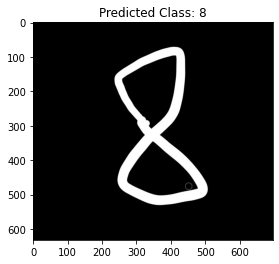

In [ ]:
import io
import requests
from PIL import Image
import numpy as np

# Define a function to predict the class of an input image
def predict_image(image_path, encoder, classifier):
    # Open and preprocess the image
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_tensor = transforms.ToTensor()(img)
    img_tensor = img_tensor.view(-1, 28*28)
    # Pass the image through the encoder and classifier
    with torch.no_grad():
        features = encoder(img_tensor)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
    # Return the predicted class
    return predicted.item()

# Upload an image and predict its class
from google.colab import files

# Upload the image
uploaded = files.upload()

# Predict the class
image_path = next(iter(uploaded))
predicted_class = predict_image(io.BytesIO(uploaded[image_path]), encoder, classifier)

# Print the predicted class
print('Predicted class:', predicted_class)

# Open the uploaded image
img = Image.open(io.BytesIO(uploaded[image_path]))

# Create a figure with the image and the predicted class as the title
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Predicted Class: {}'.format(predicted_class))

# Save the plot as a pdf
plt.savefig('prediction8.pdf')
plt.show()

Saving test_image (32).jpg to test_image (32) (1).jpg
Predicted class: 9


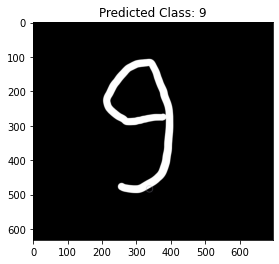

In [ ]:
import io
import requests
from PIL import Image
import numpy as np

# Define a function to predict the class of an input image
def predict_image(image_path, encoder, classifier):
    # Open and preprocess the image
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_tensor = transforms.ToTensor()(img)
    img_tensor = img_tensor.view(-1, 28*28)
    # Pass the image through the encoder and classifier
    with torch.no_grad():
        features = encoder(img_tensor)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
    # Return the predicted class
    return predicted.item()

# Upload an image and predict its class
from google.colab import files

# Upload the image
uploaded = files.upload()

# Predict the class
image_path = next(iter(uploaded))
predicted_class = predict_image(io.BytesIO(uploaded[image_path]), encoder, classifier)

# Print the predicted class
print('Predicted class:', predicted_class)

# Open the uploaded image
img = Image.open(io.BytesIO(uploaded[image_path]))

# Create a figure with the image and the predicted class as the title
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Predicted Class: {}'.format(predicted_class))

# Save the plot as a pdf
plt.savefig('prediction9.pdf')
plt.show()

# 3 - Main

## 3.1

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



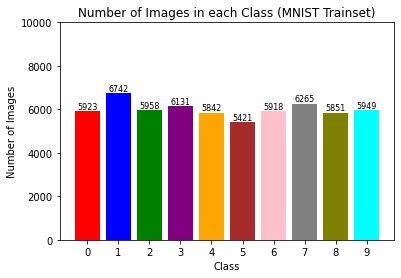

In [ ]:
import torch
import torchvision
import matplotlib.pyplot as plt

# Load MNIST training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)

# Get labels for each image in the dataset
labels = [trainset[i][1] for i in range(len(trainset))]

# Count the number of images in each class
counts = [labels.count(i) for i in range(10)]

# Define color map for different classes
colors = ['red', 'blue', 'green', 'purple', 'orange',
          'brown', 'pink', 'gray', 'olive', 'cyan']

# Plot the number-class graph
plt.bar(range(10), counts, color=colors)

# Add text labels for each class
for i in range(10):
    plt.text(i, counts[i] + 100, str(counts[i]), ha='center', fontsize=8)
#     plt.text(i, 4000, str(i), ha='center', fontsize=12)

# Set plot title, axis labels, and limits
plt.title('Number of Images in each Class (MNIST Trainset)')
plt.xlabel('Class')
plt.ylabel('Number of Images')
plt.ylim(0, 10000)

# Set x-axis ticks and labels
plt.xticks(range(10), [str(i) for i in range(10)])

# Save and show plot
plt.savefig('numberclassgraph.pdf')
plt.show()

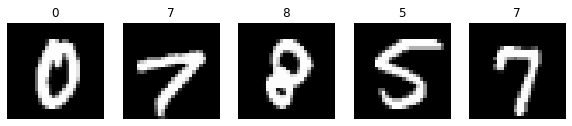

In [ ]:
import torch
import torchvision
import random
import matplotlib.pyplot as plt

# Load MNIST training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)

# Get 5 random images and their labels
indices = random.sample(range(len(trainset)), 5)
images = [trainset[i][0] for i in indices]
labels = [trainset[i][1] for i in indices]

# Plot the images
fig, axs = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    img = images[i]
    if hasattr(img, 'shape'):
        if len(img.shape) == 3 and img.shape[0] == 1:
            img = img.squeeze(0)
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(str(labels[i]))

# Save and show plot
plt.savefig('fiverand.pdf')
plt.show()

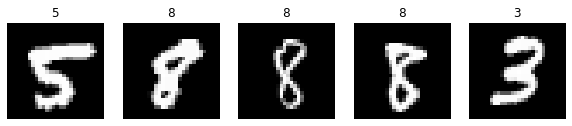

In [ ]:
import torch
import torchvision
import random
import matplotlib.pyplot as plt
import torchvision.transforms as transforms

# Load MNIST training dataset
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True)

# Calculate mean and standard deviation of the training set
train_data = trainset.data.numpy()
mean = train_data.mean() / 255.0
std = train_data.std() / 255.0

# Define data transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean, std)
])

# Get 5 random images and their labels
indices = random.sample(range(len(trainset)), 5)
images = [trainset[i][0] for i in indices]
labels = [trainset[i][1] for i in indices]

# Apply the data transformation to the images
images_normalized = [transform(img) for img in images]

# Plot the images
fig, axs = plt.subplots(1, 5, figsize=(10, 5))
for i in range(5):
    img = images_normalized[i].numpy().squeeze()
    axs[i].imshow(img, cmap='gray')
    axs[i].axis('off')
    axs[i].set_title(str(labels[i]))

# Save and show plot
plt.savefig('fiverandnormal.pdf')
plt.show()

In [ ]:
import torchvision.datasets as datasets

# Load MNIST training dataset
trainset = datasets.MNIST(root='./data', train=True, download=True)

# Get the first image in the dataset
image, label = trainset[0]

# Calculate the height and width of the image
height, width = image.size

# Print the result
print("Each data of MNIST has {} x {} = {} features.".format(height, width, height*width))

Each data of MNIST has 28 x 28 = 784 features.


## 3.2

Epoch [1/30], Train Loss: 0.0734, Valid Loss: 0.0571
Epoch [2/30], Train Loss: 0.0478, Valid Loss: 0.0387
Epoch [3/30], Train Loss: 0.0352, Valid Loss: 0.0328
Epoch [4/30], Train Loss: 0.0317, Valid Loss: 0.0300
Epoch [5/30], Train Loss: 0.0291, Valid Loss: 0.0278
Epoch [6/30], Train Loss: 0.0271, Valid Loss: 0.0258
Epoch [7/30], Train Loss: 0.0252, Valid Loss: 0.0238
Epoch [8/30], Train Loss: 0.0232, Valid Loss: 0.0220
Epoch [9/30], Train Loss: 0.0217, Valid Loss: 0.0208
Epoch [10/30], Train Loss: 0.0207, Valid Loss: 0.0199
Epoch [11/30], Train Loss: 0.0197, Valid Loss: 0.0189
Epoch [12/30], Train Loss: 0.0188, Valid Loss: 0.0182
Epoch [13/30], Train Loss: 0.0181, Valid Loss: 0.0175
Epoch [14/30], Train Loss: 0.0175, Valid Loss: 0.0170
Epoch [15/30], Train Loss: 0.0169, Valid Loss: 0.0165
Epoch [16/30], Train Loss: 0.0165, Valid Loss: 0.0161
Epoch [17/30], Train Loss: 0.0160, Valid Loss: 0.0156
Epoch [18/30], Train Loss: 0.0156, Valid Loss: 0.0152
Epoch [19/30], Train Loss: 0.0152, Va

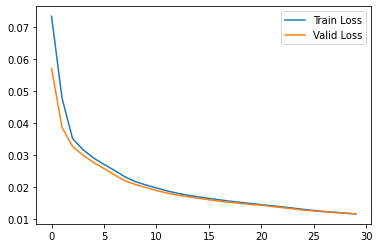

In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

# Hyperparameters
num_epochs = 30
batch_size = 64
learning_rate = 0.0001

# MNIST dataset
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 500),
            nn.ReLU(True),
            nn.Linear(500, 300),
            nn.ReLU(True),
            nn.Linear(300, 100),
            nn.ReLU(True),
            nn.Linear(100, 30),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(30, 100),
            nn.ReLU(True),
            nn.Linear(100, 300),
            nn.ReLU(True),
            nn.Linear(300, 500),
            nn.ReLU(True),
            nn.Linear(500, 784),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Create autoencoder object
autoencoder = Autoencoder()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Train the model
train_loss = []
valid_loss = []

for epoch in range(num_epochs):
    # Train
    total_loss = 0
    for i, (images, _) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        optimizer.zero_grad()
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_loss.append(total_loss/len(train_loader))

    # Validation
    total_loss = 0
    for i, (images, _) in enumerate(test_loader):
        images = Variable(images.view(-1, 28*28))
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        total_loss += loss.item()

    valid_loss.append(total_loss/len(test_loader))

    print('Epoch [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
          .format(epoch+1, num_epochs, train_loss[-1], valid_loss[-1]))

# Save the trained model weights
torch.save(autoencoder.state_dict(), 'autoencoder.pth')

# Plot loss
import matplotlib.pyplot as plt
plt.plot(train_loss, label='Train Loss')
plt.plot(valid_loss, label='Valid Loss')
plt.legend()
plt.savefig('Loss.pdf')
plt.show()

## 3.3

Epoch [1/30], Train Loss: 0.6023, Valid Loss: 0.2837, Train Acc: 0.8417, Valid Acc: 0.9136
Epoch [2/30], Train Loss: 0.2620, Valid Loss: 0.2341, Train Acc: 0.9217, Valid Acc: 0.9285
Epoch [3/30], Train Loss: 0.2250, Valid Loss: 0.1993, Train Acc: 0.9312, Valid Acc: 0.9383
Epoch [4/30], Train Loss: 0.2000, Valid Loss: 0.1851, Train Acc: 0.9383, Valid Acc: 0.9444
Epoch [5/30], Train Loss: 0.1831, Valid Loss: 0.1685, Train Acc: 0.9443, Valid Acc: 0.9482
Epoch [6/30], Train Loss: 0.1681, Valid Loss: 0.1600, Train Acc: 0.9484, Valid Acc: 0.9519
Epoch [7/30], Train Loss: 0.1566, Valid Loss: 0.1536, Train Acc: 0.9521, Valid Acc: 0.9540
Epoch [8/30], Train Loss: 0.1481, Valid Loss: 0.1383, Train Acc: 0.9544, Valid Acc: 0.9585
Epoch [9/30], Train Loss: 0.1398, Valid Loss: 0.1351, Train Acc: 0.9571, Valid Acc: 0.9574
Epoch [10/30], Train Loss: 0.1335, Valid Loss: 0.1296, Train Acc: 0.9584, Valid Acc: 0.9590
Epoch [11/30], Train Loss: 0.1281, Valid Loss: 0.1325, Train Acc: 0.9601, Valid Acc: 0.95

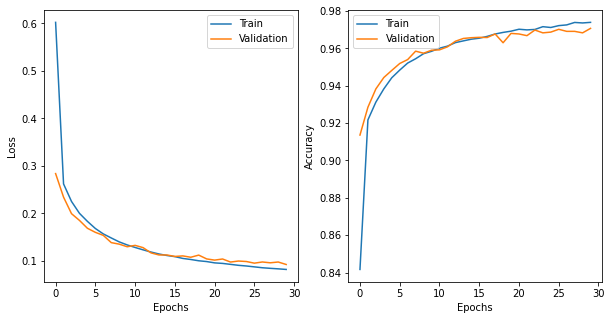

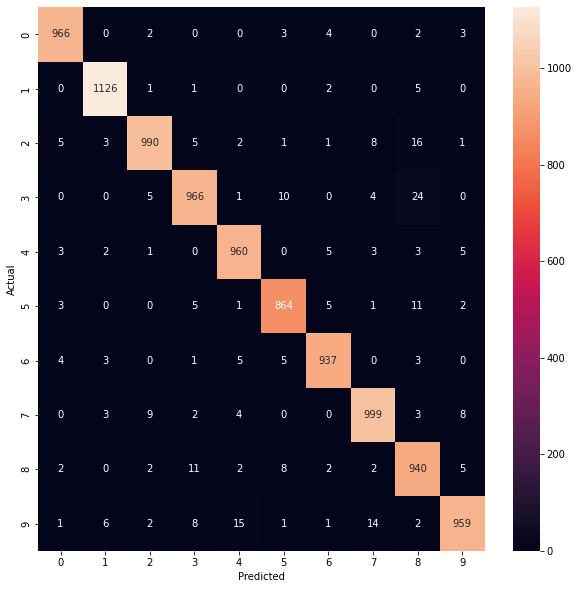

F1 Score: 0.9707119583033161
Precision: 0.9708467316384838
Recall: 0.9707


In [ ]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Hyperparameters
num_epochs = 30
batch_size = 64
learning_rate = 0.0001

# MNIST dataset
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 500),
            nn.ReLU(True),
            nn.Linear(500, 300),
            nn.ReLU(True),
            nn.Linear(300, 100),
            nn.ReLU(True),
            nn.Linear(100, 30),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(30, 100),
            nn.ReLU(True),
            nn.Linear(100, 300),
            nn.ReLU(True),
            nn.Linear(300, 500),
            nn.ReLU(True),
            nn.Linear(500, 784),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Create autoencoder object and load trained parameters
autoencoder = Autoencoder()
autoencoder.load_state_dict(torch.load('autoencoder.pth'))
encoder = autoencoder.encoder

# Classifier model
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.layer1 = nn.Linear(30, 256)
        self.layer2 = nn.Linear(256, 128)
        self.layer3 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.functional.relu(x)
        x = self.layer2(x)
        x = nn.functional.relu(x)
        x = self.layer3(x)
        return x

# Create classifier object
classifier = Classifier()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

# Train the model
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

for epoch in range(num_epochs):
    # Train
    total_loss = 0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        features = encoder(images)
        outputs = classifier(features)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss.append(total_loss/len(train_loader))
    train_acc.append(correct/total)

    # Validation
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
            features = encoder(images)
            outputs = classifier(features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    valid_loss.append(total_loss/len(test_loader))
    valid_acc.append(correct/total)

    # Print statistics
    print ('Epoch [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}, Train Acc: {:.4f}, Valid Acc: {:.4f}'
           .format(epoch+1, num_epochs, train_loss[-1], valid_loss[-1], train_acc[-1], valid_acc[-1]))

# Save the trained model weights
torch.save(classifier.state_dict(), 'classifier.pth')

# Plot loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train')
plt.plot(valid_loss, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train')
plt.plot(valid_acc, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('LossAccur2.pdf')
plt.show()

# Evaluate the model
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        labels = labels.numpy().tolist()
        features = encoder(images)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
        predicted = predicted.numpy().tolist()
        y_true.extend(labels)
        y_pred.extend(predicted)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('conf.pdf')
plt.show()

# Report metrics
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)

Saving test_image.jpg to test_image (1).jpg
Predicted class: 2


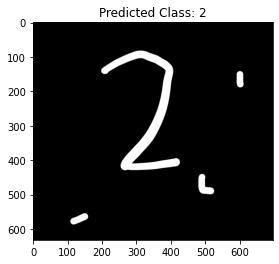

In [ ]:
import io
import requests
from PIL import Image
import numpy as np

# Define a function to predict the class of an input image
def predict_image(image_path, encoder, classifier):
    # Open and preprocess the image
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_tensor = transforms.ToTensor()(img)
    img_tensor = img_tensor.view(-1, 28*28)
    # Pass the image through the encoder and classifier
    with torch.no_grad():
        features = encoder(img_tensor)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
    # Return the predicted class
    return predicted.item()

# Upload an image and predict its class
from google.colab import files

# Upload the image
uploaded = files.upload()

# Predict the class
image_path = next(iter(uploaded))
predicted_class = predict_image(io.BytesIO(uploaded[image_path]), encoder, classifier)

# Print the predicted class
print('Predicted class:', predicted_class)

# Open the uploaded image
img = Image.open(io.BytesIO(uploaded[image_path]))

# Create a figure with the image and the predicted class as the title
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Predicted Class: {}'.format(predicted_class))

# Save the plot as a pdf
plt.savefig('prediction22.pdf')
plt.show()

Saving test_image.jpg to test_image (9).jpg
Predicted class: 5


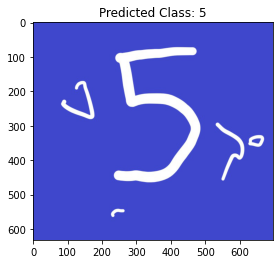

In [ ]:
import io
import requests
from PIL import Image
import numpy as np

# Define a function to predict the class of an input image
def predict_image(image_path, encoder, classifier):
    # Open and preprocess the image
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_tensor = transforms.ToTensor()(img)
    img_tensor = img_tensor.view(-1, 28*28)
    # Pass the image through the encoder and classifier
    with torch.no_grad():
        features = encoder(img_tensor)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
    # Return the predicted class
    return predicted.item()

# Upload an image and predict its class
from google.colab import files

# Upload the image
uploaded = files.upload()

# Predict the class
image_path = next(iter(uploaded))
predicted_class = predict_image(io.BytesIO(uploaded[image_path]), encoder, classifier)

# Print the predicted class
print('Predicted class:', predicted_class)

# Open the uploaded image
img = Image.open(io.BytesIO(uploaded[image_path]))

# Create a figure with the image and the predicted class as the title
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Predicted Class: {}'.format(predicted_class))

# Save the plot as a pdf
plt.savefig('prediction555.pdf')
plt.show()

# 3 - Main

## 3.2

Epoch [1/100], Train Loss: 0.0738, Valid Loss: 0.0586
Epoch [2/100], Train Loss: 0.0476, Valid Loss: 0.0397
Epoch [3/100], Train Loss: 0.0356, Valid Loss: 0.0328
Epoch [4/100], Train Loss: 0.0313, Valid Loss: 0.0291
Epoch [5/100], Train Loss: 0.0282, Valid Loss: 0.0266
Epoch [6/100], Train Loss: 0.0260, Valid Loss: 0.0248
Epoch [7/100], Train Loss: 0.0246, Valid Loss: 0.0238
Epoch [8/100], Train Loss: 0.0234, Valid Loss: 0.0222
Epoch [9/100], Train Loss: 0.0217, Valid Loss: 0.0206
Epoch [10/100], Train Loss: 0.0203, Valid Loss: 0.0195
Epoch [11/100], Train Loss: 0.0194, Valid Loss: 0.0188
Epoch [12/100], Train Loss: 0.0187, Valid Loss: 0.0182
Epoch [13/100], Train Loss: 0.0181, Valid Loss: 0.0177
Epoch [14/100], Train Loss: 0.0175, Valid Loss: 0.0171
Epoch [15/100], Train Loss: 0.0171, Valid Loss: 0.0168
Epoch [16/100], Train Loss: 0.0166, Valid Loss: 0.0164
Epoch [17/100], Train Loss: 0.0162, Valid Loss: 0.0160
Epoch [18/100], Train Loss: 0.0159, Valid Loss: 0.0157
Epoch [19/100], Tra

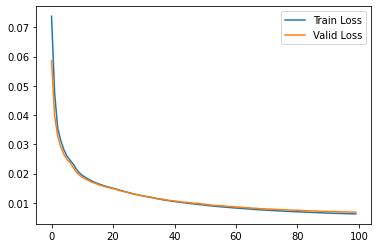

In [4]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable

# Hyperparameters
num_epochs = 100
batch_size = 64
learning_rate = 0.0001

# MNIST dataset
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 500),
            nn.ReLU(True),
            nn.Linear(500, 250),
            nn.ReLU(True),
            nn.Linear(250, 100),
            nn.ReLU(True),
            nn.Linear(100, 30),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(30, 100),
            nn.ReLU(True),
            nn.Linear(100, 250),
            nn.ReLU(True),
            nn.Linear(250, 500),
            nn.ReLU(True),
            nn.Linear(500, 784),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Create autoencoder object
autoencoder = Autoencoder()

# Loss function and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(autoencoder.parameters(), lr=learning_rate)

# Train the model
train_loss = []
valid_loss = []

for epoch in range(num_epochs):
    # Train
    total_loss = 0
    for i, (images, _) in enumerate(train_loader):
        images = Variable(images.view(-1, 28*28))
        optimizer.zero_grad()
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()

    train_loss.append(total_loss/len(train_loader))

    # Validation
    total_loss = 0
    for i, (images, _) in enumerate(test_loader):
        images = Variable(images.view(-1, 28*28))
        outputs = autoencoder(images)
        loss = criterion(outputs, images)
        total_loss += loss.item()

    valid_loss.append(total_loss/len(test_loader))

    print('Epoch [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}'
          .format(epoch+1, num_epochs, train_loss[-1], valid_loss[-1]))

# Save the trained model weights
torch.save(autoencoder.state_dict(), 'autoencoder.pth')

# Plot loss
import matplotlib.pyplot as plt
plt.plot(train_loss, label='Train Loss')
plt.plot(valid_loss, label='Valid Loss')
plt.legend()
plt.savefig('Loss.pdf')
plt.show()

## 3.3

Epoch [1/100], Train Loss: 0.9578, Valid Loss: 0.3639, Train Acc: 0.7529, Valid Acc: 0.9123
Epoch [2/100], Train Loss: 0.3094, Valid Loss: 0.2589, Train Acc: 0.9131, Valid Acc: 0.9288
Epoch [3/100], Train Loss: 0.2498, Valid Loss: 0.2266, Train Acc: 0.9263, Valid Acc: 0.9347
Epoch [4/100], Train Loss: 0.2232, Valid Loss: 0.2046, Train Acc: 0.9333, Valid Acc: 0.9399
Epoch [5/100], Train Loss: 0.2058, Valid Loss: 0.1866, Train Acc: 0.9382, Valid Acc: 0.9448
Epoch [6/100], Train Loss: 0.1925, Valid Loss: 0.1758, Train Acc: 0.9427, Valid Acc: 0.9499
Epoch [7/100], Train Loss: 0.1813, Valid Loss: 0.1651, Train Acc: 0.9459, Valid Acc: 0.9521
Epoch [8/100], Train Loss: 0.1708, Valid Loss: 0.1604, Train Acc: 0.9489, Valid Acc: 0.9541
Epoch [9/100], Train Loss: 0.1621, Valid Loss: 0.1508, Train Acc: 0.9516, Valid Acc: 0.9559
Epoch [10/100], Train Loss: 0.1540, Valid Loss: 0.1454, Train Acc: 0.9541, Valid Acc: 0.9565
Epoch [11/100], Train Loss: 0.1479, Valid Loss: 0.1389, Train Acc: 0.9554, Vali

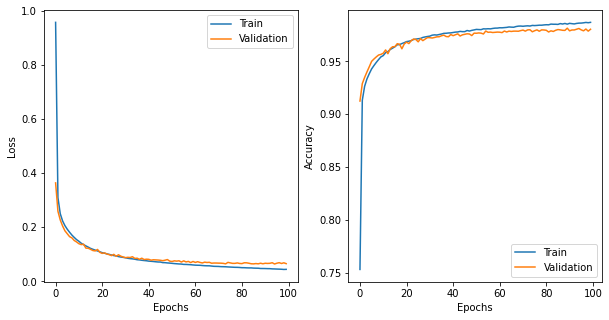

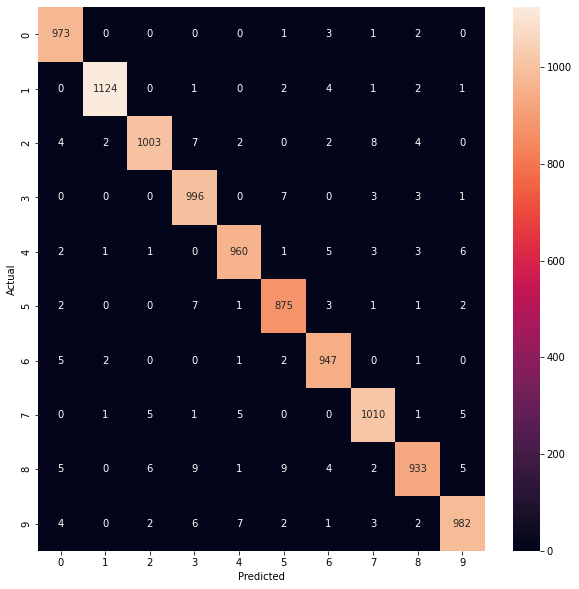

F1 Score: 0.9802860641202584
Precision: 0.980346785543814
Recall: 0.9803


In [5]:
import torch
import torch.nn as nn
import torchvision.datasets as dsets
import torchvision.transforms as transforms
from torch.autograd import Variable
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

# Hyperparameters
num_epochs = 100
batch_size = 64
learning_rate = 0.0001

# MNIST dataset
train_dataset = dsets.MNIST(root='./data',
                            train=True,
                            transform=transforms.ToTensor(),
                            download=True)

test_dataset = dsets.MNIST(root='./data',
                           train=False,
                           transform=transforms.ToTensor())

# Data loader
train_loader = torch.utils.data.DataLoader(dataset=train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)

test_loader = torch.utils.data.DataLoader(dataset=test_dataset,
                                          batch_size=batch_size,
                                          shuffle=False)

# Autoencoder model
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        self.encoder = nn.Sequential(
            nn.Linear(784, 500),
            nn.ReLU(True),
            nn.Linear(500, 250),
            nn.ReLU(True),
            nn.Linear(250, 100),
            nn.ReLU(True),
            nn.Linear(100, 30),
            nn.ReLU(True))
        self.decoder = nn.Sequential(
            nn.Linear(30, 100),
            nn.ReLU(True),
            nn.Linear(100, 250),
            nn.ReLU(True),
            nn.Linear(250, 500),
            nn.ReLU(True),
            nn.Linear(500, 784),
            nn.Sigmoid())

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x

# Create autoencoder object and load trained parameters
autoencoder = Autoencoder()
autoencoder.load_state_dict(torch.load('autoencoder.pth'))
encoder = autoencoder.encoder

# Classifier model
class Classifier(nn.Module):
    def __init__(self):
        super(Classifier, self).__init__()
        self.layer1 = nn.Linear(30, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)

    def forward(self, x):
        x = self.layer1(x)
        x = nn.functional.relu(x)
        x = self.layer2(x)
        x = nn.functional.relu(x)
        x = self.layer3(x)
        return x

# Create classifier object
classifier = Classifier()

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(classifier.parameters(), lr=learning_rate)

# Train the model
train_loss = []
valid_loss = []
train_acc = []
valid_acc = []

for epoch in range(num_epochs):
    # Train
    total_loss = 0
    correct = 0
    total = 0
    for images, labels in train_loader:
        images = Variable(images.view(-1, 28*28))
        labels = Variable(labels)
        features = encoder(images)
        outputs = classifier(features)
        loss = criterion(outputs, labels)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        correct += (predicted == labels).sum().item()
        total += labels.size(0)

    train_loss.append(total_loss/len(train_loader))
    train_acc.append(correct/total)

    # Validation
    total_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test_loader:
            images = Variable(images.view(-1, 28*28))
            labels = Variable(labels)
            features = encoder(images)
            outputs = classifier(features)
            loss = criterion(outputs, labels)
            total_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            correct += (predicted == labels).sum().item()
            total += labels.size(0)

    valid_loss.append(total_loss/len(test_loader))
    valid_acc.append(correct/total)

    # Print statistics
    print ('Epoch [{}/{}], Train Loss: {:.4f}, Valid Loss: {:.4f}, Train Acc: {:.4f}, Valid Acc: {:.4f}'
           .format(epoch+1, num_epochs, train_loss[-1], valid_loss[-1], train_acc[-1], valid_acc[-1]))

# Save the trained model weights
torch.save(classifier.state_dict(), 'classifier.pth')

# Plot loss and accuracy
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train')
plt.plot(valid_loss, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(train_acc, label='Train')
plt.plot(valid_acc, label='Validation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig('LossAccur2.pdf')
plt.show()

# Evaluate the model
y_true = []
y_pred = []
with torch.no_grad():
    for images, labels in test_loader:
        images = Variable(images.view(-1, 28*28))
        labels = labels.numpy().tolist()
        features = encoder(images)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
        predicted = predicted.numpy().tolist()
        y_true.extend(labels)
        y_pred.extend(predicted)

# Plot confusion matrix
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.savefig('conf.pdf')
plt.show()

# Report metrics
f1 = f1_score(y_true, y_pred, average='weighted')
precision = precision_score(y_true, y_pred, average='weighted')
recall = recall_score(y_true, y_pred, average='weighted')
print('F1 Score:', f1)
print('Precision:', precision)
print('Recall:', recall)

Saving test_image (32).jpg to test_image (32) (3).jpg
Predicted class: 2


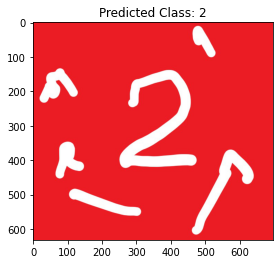

In [9]:
import io
import requests
from PIL import Image
import numpy as np

# Define a function to predict the class of an input image
def predict_image(image_path, encoder, classifier):
    # Open and preprocess the image
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_tensor = transforms.ToTensor()(img)
    img_tensor = img_tensor.view(-1, 28*28)
    # Pass the image through the encoder and classifier
    with torch.no_grad():
        features = encoder(img_tensor)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
    # Return the predicted class
    return predicted.item()

# Upload an image and predict its class
from google.colab import files

# Upload the image
uploaded = files.upload()

# Predict the class
image_path = next(iter(uploaded))
predicted_class = predict_image(io.BytesIO(uploaded[image_path]), encoder, classifier)

# Print the predicted class
print('Predicted class:', predicted_class)

# Open the uploaded image
img = Image.open(io.BytesIO(uploaded[image_path]))

# Create a figure with the image and the predicted class as the title
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Predicted Class: {}'.format(predicted_class))

# Save the plot as a pdf
plt.savefig('prediction22.pdf')
plt.show()

Saving test_image (32).jpg to test_image (32) (17).jpg
Predicted class: 0


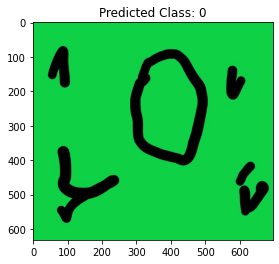

In [23]:
import io
import requests
from PIL import Image
import numpy as np

# Define a function to predict the class of an input image
def predict_image(image_path, encoder, classifier):
    # Open and preprocess the image
    img = Image.open(image_path).convert('L')
    img = img.resize((28, 28))
    img_tensor = transforms.ToTensor()(img)
    img_tensor = img_tensor.view(-1, 28*28)
    # Pass the image through the encoder and classifier
    with torch.no_grad():
        features = encoder(img_tensor)
        outputs = classifier(features)
        _, predicted = torch.max(outputs.data, 1)
    # Return the predicted class
    return predicted.item()

# Upload an image and predict its class
from google.colab import files

# Upload the image
uploaded = files.upload()

# Predict the class
image_path = next(iter(uploaded))
predicted_class = predict_image(io.BytesIO(uploaded[image_path]), encoder, classifier)

# Print the predicted class
print('Predicted class:', predicted_class)

# Open the uploaded image
img = Image.open(io.BytesIO(uploaded[image_path]))

# Create a figure with the image and the predicted class as the title
fig, ax = plt.subplots()
ax.imshow(img)
ax.set_title('Predicted Class: {}'.format(predicted_class))

# Save the plot as a pdf
plt.savefig('prediction000.pdf')
plt.show()